# Importando bibliotecas, dados e fazendo as primeiras análises

In [ ]:
#Importando as bibliotecas que inicialmente identifiquei como importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Importando o dataset
df = pd.read_csv('/content/dados_concreto_-_Sheet1.csv')

In [ ]:
#Checagem inical dos dados
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,Alto
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,Alto
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,Baixa
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,Baixa
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,Baixa


Como pode ser observado acima as colunas estão em inglês então para este desafio traduzirei para português. Como não tenho conhecimento sobre o assunto usarei o ChatGPT para tentar realizar a tradução mais tecnicamente correta.

In [ ]:
#Traduzindo os nomes das colunas
df.columns = [
    "Cimento",
    "Escória de Alto-Forno",
    "Cinza Volante",
    "Água",
    "Aditivo Superplastificante",
    "Agregado Graúdo",
    "Agregado Miúdo",
    "Idade (dias)",
    "Resistência à Compressão do Concreto (MPa)",
    "Categoria de Força"
]
df.columns

Index(['Cimento', 'Escória de Alto-Forno', 'Cinza Volante', 'Água',
       'Aditivo Superplastificante', 'Agregado Graúdo', 'Agregado Miúdo',
       'Idade (dias)', 'Resistência à Compressão do Concreto (MPa)',
       'Categoria de Força'],
      dtype='object')

In [ ]:
#Checando o dataset traduzido
df.head()

,Cimento,Escória de Alto-Forno,Cinza Volante,Água,Aditivo Superplastificante,Agregado Graúdo,Agregado Miúdo,Idade (dias),Resistência à Compressão do Concreto (MPa),Categoria de Força
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,Alto
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,Alto
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,Baixa
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,Baixa
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,Baixa


In [ ]:
#Verificando o formato do dataset
df.shape

(2029, 10)

# Etapa 01) Análise Exploratória de Dados (EDA)

Vou começar a EDA tentando responder a 1ª pergunta:

- Quais fatores estão mais associados à resistência do concreto?

Para isso criarei uma matriz de correlação entre as variáveis numéricas e analisar acorrelação entre cada variável e a variável "Resistência à Compressão do Concreto (MPa)"

In [1]:
#Criando e analisando a matriz de correlação
matriz_correlacao = df.drop(columns=["Categoria de Resistência"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

NameError: name 'df' is not defined

Bom, através da Matriz pode-se notar que as variáveis "Cinza Volante", "Água", "Agregado Graúdo" e "Agregado Miúdo" têm uma correlação quase inexistente em relação a "Resistência à Compressão do Concreto (MPa)", a variável "Escória de Alto-Forno" um correlação fraca positiva, e as variáveis "Cimento", "Aditivo Superplastificante" e "Idade (dias)", uma correlação também positiva de fraca a média.

Após essa análise inicial pode-se concluir que os fatores que mais podem influenciar a resistência do concreto são: "Cimento", "Aditivo Superplastificante" e "Idade (dias)". Para confirmar este pensamento executarei gráficos de dispersão destas três variáveis.

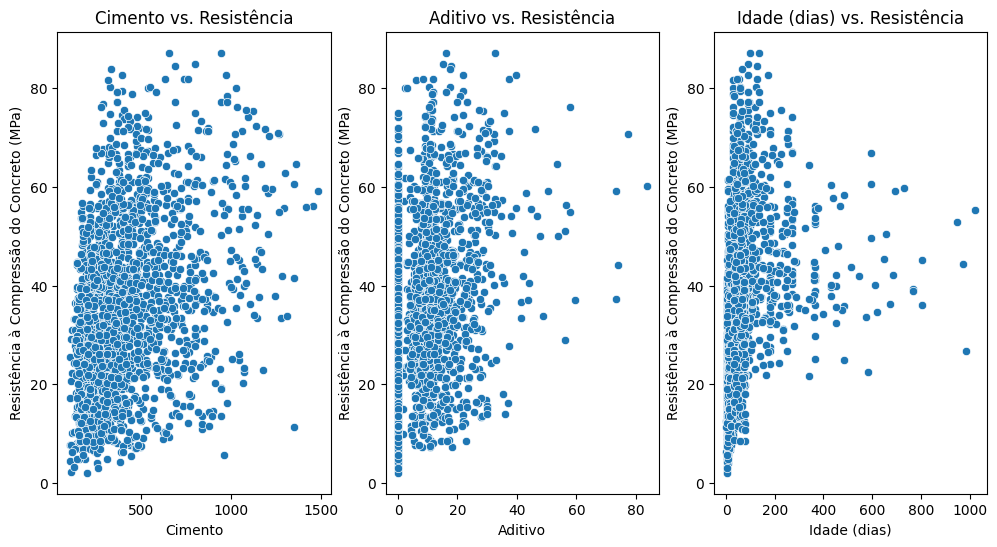

In [ ]:
#Criando ma figura com os subplots de cada gráfico de dispersão
plt.figure(figsize=(12, 6))
#Gráfico de dispersão Cimento x Resistência
plt.subplot(1, 3, 1)
sns.scatterplot(x="Cimento", y="Resistência à Compressão do Concreto (MPa)", data=df)
plt.title("Cimento vs. Resistência")
plt.xlabel("Cimento")
plt.ylabel("Resistência à Compressão do Concreto (MPa)")

#Gráfico de dispersão Aditivo Superplastificante x Resistência
plt.subplot(1, 3, 2)
sns.scatterplot(x="Aditivo Superplastificante", y="Resistência à Compressão do Concreto (MPa)", data=df)
plt.title("Aditivo vs. Resistência")
plt.xlabel("Aditivo")
plt.ylabel("Resistência à Compressão do Concreto (MPa)")

#Gráfico de dispersão Idade (dias) x Resistência
plt.subplot(1, 3, 3)
sns.scatterplot(x="Idade (dias)", y="Resistência à Compressão do Concreto (MPa)", data=df)
plt.title("Idade (dias) vs. Resistência")
plt.xlabel("Idade (dias)")
plt.ylabel("Resistência à Compressão do Concreto (MPa)")

plt.show()

Olhando os gráficos acima é possível notar que as varíaveis "Aditivo Superplastificante" e "Idade (dias)" parecem apresentar uma correlação mais fraca do que a apresentada na matriz de correlação. Apesar disso elas ainda apresentam tendência positiva, o que me leva a concluir que sim há uma associação, fraca, entre as das variáveis citadas e a resistência do concreto.

Sobre a variável "Cimento", ela é a nossa 2ª pergunta de negócio:

- Como a quantidade de cimento afeta a resistência do concreto?

Devido a isso gerarei um gráfico de dispersão somente dela e farei uma análise individualizada.

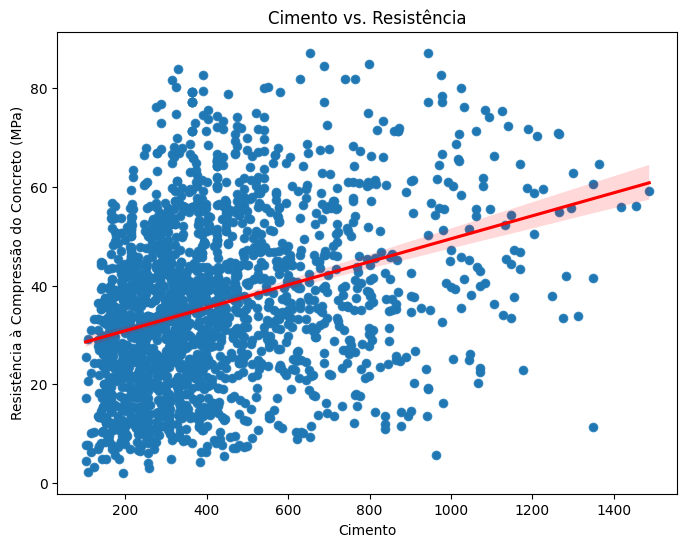

In [ ]:
#Criando o gráfico de dispersão Cimento x Resistência
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Cimento", y="Resistência à Compressão do Concreto (MPa)", data=df)
plt.title("Cimento vs. Resistência")
plt.xlabel("Cimento")
plt.ylabel("Resistência à Compressão do Concreto (MPa)")
sns.regplot(x="Cimento", y="Resistência à Compressão do Concreto (MPa)", data=df, line_kws={'color': 'red'})
plt.show()

Obeservando o gráfico nota-se uma tendência um pouco mais presente que nas outras variáveis, em que a quantidade de cimento possa significar um aumento da resistência do concreto. Observe que o uso do termo "possa" é justificado pois apesar de haver uma tendência, a correlação ainda é fraca.

Seguindo para a 3ª pergunta de negócios:

- Como a água afeta a resistência do concreto?

Será utilizado o mesmo método da pergunta anterior para identificar uma possível tendência entra a quantidade de água e a resistência do concreto.

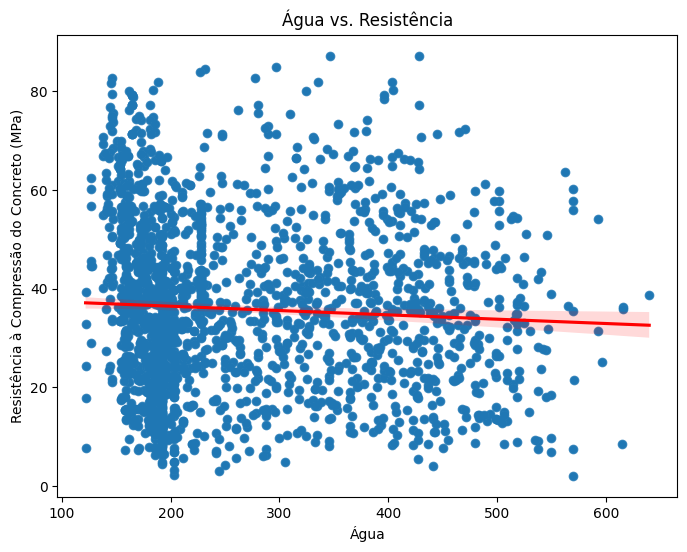

In [ ]:
#Criando o gráfico de dispersão Água x Resistência
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Água", y="Resistência à Compressão do Concreto (MPa)", data=df)
plt.title("Água vs. Resistência")
plt.xlabel("Água")
plt.ylabel("Resistência à Compressão do Concreto (MPa)")
sns.regplot(x="Água", y="Resistência à Compressão do Concreto (MPa)", data=df, line_kws={'color': 'red'})
plt.show()

Observando apenas o gráfico de dispersão ficamuito difícil observar qualquer tendência por isso aqui a reta gerada pelo sns.regplot() faz batante diferença. Ela confirma o que o que o gráfico mostra, a correlação aqui é extremamente fraca, mas há uma tendência negativa, ou seja, se a correlação fosse mais forte quanto mais água menor seria a resistência. Porém, como praticamente inexiste qualquer tipo de correlação, não sepode fazer qualquer afirmação no sentido que a água afete de alguma forma a resistência.

Partindo agora para a 4ª e última pergunta:

- Qual é a resistência média do concreto por categoria de força?

Irei calcular a resistência média de cada categoria e criar um gráfico de barras para análises futuras.

In [ ]:
#Agrupando os valores por Categoria de Força e calculando a resistência média
df.groupby("Categoria de Força")["Resistência à Compressão do Concreto (MPa)"].mean()

,Resistência à Compressão do Concreto (MPa)
Categoria de Força,
Alto,68.810265
Baixa,32.488236


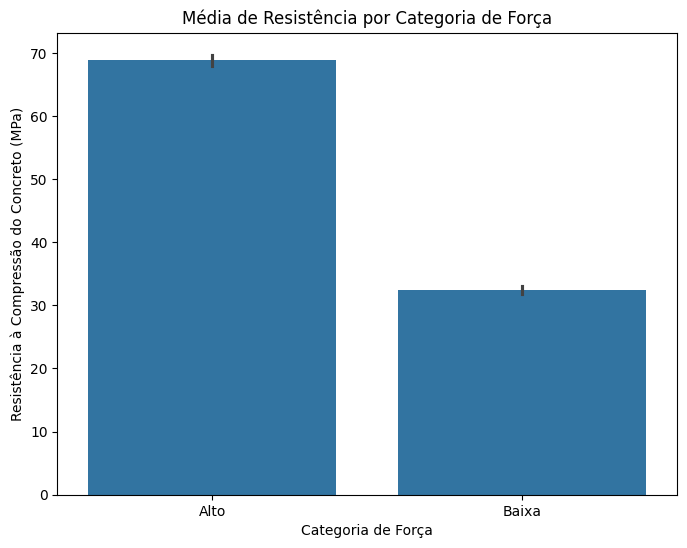

In [ ]:
#Criando o gráfico de barras de média de rexistência x categoria de força
plt.figure(figsize=(8, 6))
sns.barplot(x="Categoria de Força", y="Resistência à Compressão do Concreto (MPa)", data=df)
plt.title("Média de Resistência por Categoria de Força")
plt.xlabel("Categoria de Força")
plt.ylabel("Resistência à Compressão do Concreto (MPa)")
plt.show()

In [ ]:
#Verificando o quantitativo de cada categoria
df['Categoria de Força'].value_counts()

,count
Categoria de Força,
Baixa,1840
Alto,189


No gráfico observa-se que a média de resistência para a categoria de força "Baixa" é próxima da metade em comparação com a categoria "Alto". Porém, ao fazer uma análise mais aprofundada, nota-se que existem quase 10x mais registros de categoria "Baixa", e isso pode enviesar a análise.

Concluindo a 1ª Etapa pode se levantar os seguintes pontos em relação aos dados apresentados:


1.  A resistência tem correlação relativamente fraca com praticamente todas as outras variáveis numéricas;
2.  A variável que visualmente apresenta uma maior correlação com a resistência é a quantidade de cimento; e
3.  A resitência média é maior para a categoria "Alto", porém, a disparidade de registros entre "Alto" e "Baixa" pode ser um problema para a análise.

# Etapa 02) Tratamento de Dados

Para esta etapa realizarei alguns tratamentos obrigatórios para ter um modelo que funcione bem. Primeiro irei verificar a presença de valores nulos ou ausentes. Em seguida, realizarei a remoção dos mesmos e, por fim, aplicarei One-Hot Encoding para transformar a variável categórica "Categoria de Força" em variável numérica.

In [ ]:
#Verificando quais variáveis têm valores faltantes
df.isnull().sum()

,0
Cimento,0
Escória de Alto-Forno,0
Cinza Volante,0
Água,0
Aditivo Superplastificante,0
Agregado Graúdo,0
Agregado Miúdo,0
Idade (dias),0
Resistência à Compressão do Concreto (MPa),9
Categoria de Força,0


In [ ]:
#Removendo valores faltantes
df.dropna(inplace=True)

In [ ]:
#Checando se os valores foram removidos
df.isnull().sum()

,0
Cimento,0
Escória de Alto-Forno,0
Cinza Volante,0
Água,0
Aditivo Superplastificante,0
Agregado Graúdo,0
Agregado Miúdo,0
Idade (dias),0
Resistência à Compressão do Concreto (MPa),0
Categoria de Força,0


In [ ]:
#Confirmando a alteração no dataset
df.shape

(2020, 10)

Como se pôde observar existiam apenas 9 valores faltantes e apenas na variável "Resistência à Compressão do Concreto (MPa)", então de fato a remoção destes valores foi o melhor caminho, tendo em vista que, a quantidade era muito pequena para impactar o dataset.

In [ ]:
#Aplicando o One-Hot Encoding
df_codificado = pd.get_dummies(df, columns=['Categoria de Força'], drop_first=True)
df_codificado

,Cimento,Escória de Alto-Forno,Cinza Volante,Água,Aditivo Superplastificante,Agregado Graúdo,Agregado Miúdo,Idade (dias),Resistência à Compressão do Concreto (MPa),Categoria de Força_Baixa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,False
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,False
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,True
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,True
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,True
...,...,...,...,...,...,...,...,...,...,...
2023,607.2,237.8,0.0,448.4,17.4,1701.5,1156.0,78.4,33.40,True
2024,449.2,0.0,0.0,323.3,17.4,2229.0,1314.7,30.8,39.10,True
2026,183.1,310.3,0.0,380.0,17.0,2604.7,1299.4,30.8,24.20,True
2027,651.0,399.8,0.0,386.2,19.0,2102.9,1125.6,72.8,40.80,True


Após a aplicação do método pd.get_dummies() a variável "Categoria de Força" se transformou em "Categoria de Força_Baixa" e os seus valores se tornaram booleanos. Após esse pré-processamento dos dados será possível seguir para a construção dos modelos.

# Etapa 03) Construção e Avaliação de Modelos de Regressão

Antes de partir para a criação dos modelos, irei fazer a divisão dos dados em treino e teste. Após isso, utilizarei o RandomForestRegressor e o LinearRegression para modelar meus dados e comparar qual é o melhor modelo para prever a resitência do concreto, utilizando os parâmetros padrão.

In [ ]:
#Definindo minhas 'features' e meu 'target'
X = df_codificado.drop('Resistência à Compressão do Concreto (MPa)', axis=1)
y = df_codificado['Resistência à Compressão do Concreto (MPa)']

#Fazendo a divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Verificando os shapes de treino e teste
print("Shape de X_train:", X_train.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (1616, 9)
Shape de y_train: (1616,)
Shape de X_test: (404, 9)
Shape de y_test: (404,)


In [ ]:
#Criando o modelo utilizando o Random Forest
modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Fazendo a previsão e analisando as métricas R² e MAE
y_pred  = modelo.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_squared_error(y_test, y_pred))

R²: 0.8176825520328866
MAE: 49.808228737587136


In [ ]:
#Criando o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Fazendo a previsão e analisando as métricas R² e MAE
y_pred = modelo.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_squared_error(y_test, y_pred))

R²: 0.5193022302862832
MAE: 131.32426289703005


Finalizando a criação dos modelos concluí-se que, analisando apenas as métricas R² e MAE e, com os modelos configurados com seus parâmetros padrão o Rando Fores é sem dúvidas a melhor escolha dentre os 2. O Random Forest apresenta um MAE de 49,8 contra um MAE de 131,3 da Regressão Linear o que indica que o erro médio do Random Forest é menor. Partindo para a análise do R² o Random Forest atingiu um score de 0,81 contra 0,51 da Regressão. Considerando que um R²mais próximo de 1 é melhor, o Random Forest novamente se mostrou bem superior à Regressão.

Diante dos fatos expostos, para a continuação e finalização do desafio o modelo escolhido foi o Random Forest.

# Etapa 04) Predizendo um resultado

Para finalizar o desafio, farei uma previsão da resistência para os valores abaixo:
- Cimento: 550
- Escória de Alto Forno: 150
- Cinza Volante: 0
- Água: 180
- Superplastificante: 2.5
- Agregado Graúdo: 1000
- Agregado Miúdo: 700
- Idade: 25

Como o desafio não citou a variável "Categoria de Força_Baixa", tomei a liberdade de preenche-la como True.

Posteriormente, farei vários testes de como cada variável pode afetar o valor da resistência do concreto.

In [ ]:
#Fazendo a previsão da resistência para os valores solicitados
previsao = modelo.predict([[550, 150, 0, 180, 2.5, 1000, 700, 25, True]])

print(f"A resistência prevista é de: {previsao[0]:.2f} MPa")

A resistência prevista é de: 49.33 MPa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Testando como a varíavel "cimento" afeta o modelo
previsao_maior = modelo.predict([[750, 150, 0, 180, 2.5, 1000, 700, 25, True]])
previsao_menor = modelo.predict([[250, 150, 0, 180, 2.5, 1000, 700, 25, True]])

print(f"A resistência prevista para um cimento maior é de: {previsao_maior[0]:.2f} MPa")
print(f"A resistência prevista para um cimento menor é de: {previsao_menor[0]:.2f} MPa")

A resistência prevista para um cimento maior é de: 49.99 MPa
A resistência prevista para um cimento menor é de: 35.07 MPa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Testando como a variável "Escória de Alto Forno" afeta o modelo
previsao_maior = modelo.predict([[550, 200, 0, 180, 2.5, 1000, 700, 25, True]])
previsao_menor = modelo.predict([[550, 100, 0, 180, 2.5, 1000, 700, 25, True]])

print(f"A resistência prevista para uma esória de alto forno maior é de: {previsao_maior[0]:.2f} MPa")
print(f"A resistência prevista para uma esória de alto forno menor é de: {previsao_menor[0]:.2f} MPa")

A resistência prevista para uma esória de alto forno maior é de: 49.10 MPa
A resistência prevista para uma esória de alto forno menor é de: 49.53 MPa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Testando como a variável "Cinza Volante" afeta o modelo
previsao = modelo.predict([[550, 150, 100, 180, 2.5, 1000, 700, 25, True]])

print(f"A resistência prevista é de: {previsao[0]:.2f} MPa")

A resistência prevista é de: 47.27 MPa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Testando como a variável "Água" afeta o modelo
previsao_maior = modelo.predict([[550, 150, 0, 280, 2.5, 1000, 700, 25, True]])
previsao_menor = modelo.predict([[550, 150, 0, 80, 2.5, 1000, 700, 25, True]])

print(f"A resistência prevista para uma água maior é de: {previsao_maior[0]:.2f} MPa")
print(f"A resistência prevista para uma água menor é de: {previsao_menor[0]:.2f} MPa")

A resistência prevista para uma água maior é de: 45.07 MPa
A resistência prevista para uma água menor é de: 51.07 MPa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Testando como a variável "Superplastificante" afeta o modelo
previsao_maior = modelo.predict([[550, 150, 0, 180, 12.5, 1000, 700, 25, True]])
previsao_menor = modelo.predict([[550, 150, 0, 180, 0, 1000, 700, 25, True]])

print(f"A resistência prevista para um superplastificante maior é de: {previsao_maior[0]:.2f} MPa")
print(f"A resistência prevista para um superplastificante menor é de: {previsao_menor[0]:.2f} MPa")

A resistência prevista para um superplastificante maior é de: 50.01 MPa
A resistência prevista para um superplastificante menor é de: 43.41 MPa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Testando como a variável "Agregado Graúdo" afeta o modelo
previsao_maior = modelo.predict([[550, 150, 0, 180, 2.5, 2000, 700, 25, True]])
previsao_menor = modelo.predict([[550, 150, 0, 180, 2.5, 1000, 700, 25, True]])

print(f"A resistência prevista para um agregado graúdo maior é de: {previsao_maior[0]:.2f} MPa")
print(f"A resistência prevista para um agregado graúdo menor é de: {previsao_menor[0]:.2f} MPa")

A resistência prevista para um agregado graúdo maior é de: 46.49 MPa
A resistência prevista para um agregado graúdo menor é de: 49.33 MPa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Testando como a variável "Agregado Miúdo" afeta o modelo
previsao_maior = modelo.predict([[550, 150, 0, 180, 2.5, 1000, 1050, 25, True]])
previsao_menor = modelo.predict([[550, 150, 0, 180, 2.5, 1000, 350, 25, True]])

print(f"A resistência prevista para um agregado miúdo maior é de: {previsao_maior[0]:.2f} MPa")
print(f"A resistência prevista para um agregado miúdo menor é de: {previsao_menor[0]:.2f} MPa")

A resistência prevista para um agregado miúdo maior é de: 47.40 MPa
A resistência prevista para um agregado miúdo menor é de: 49.49 MPa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Testando como a variável "Idade" afeta o modelo
previsao_maior = modelo.predict([[550, 150, 0, 180, 2.5, 1000, 700, 5, True]])
previsao_menor = modelo.predict([[550, 150, 0, 180, 2.5, 1000, 700, 45, True]])

print(f"A resistência prevista para uma idade maior é de: {previsao_maior[0]:.2f} MPa")
print(f"A resistência prevista para uma idade menor é de: {previsao_menor[0]:.2f} MPa")

A resistência prevista para uma idade maior é de: 33.32 MPa
A resistência prevista para uma idade menor é de: 52.02 MPa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Testando como a variável "Categoria de Força_Baixa" afeta o modelo
previsao = modelo.predict([[550, 150, 0, 180, 2.5, 1000, 700, 25, False]])

print(f"A resistência prevista para a categoria alta é de: {previsao[0]:.2f} MPa")


A resistência prevista para a categoria alta é de: 72.12 MPa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Provavelmente havia uma maneira mais eficiente de verificar cada variável, um def() ouquem sabe um laço *for*, porém quis fazer o experimento da forma mais didática possível, abaixo colocarei os valores de cada previsão para analisar quais as variáveis que mais afetam o modelo.

- Previsão Base: 49,33.

- Cimento maior: 49,99
- Cimento menor: 45,07

- Escória de Alto Forno Maior: 49,10
- Escória de Alto Forno Menor: 49,53

- Cinza Volante !=0: 47,27

- Água Maior: 45,07
- Água Menor: 51,07

- Superplastificante Maior: 50,01
- Superplastificante Menor: 43,41

- Agregado Graúdo Maior: 46,41
- Agregado Graúdo Menor: 49,33

- Agregado Miúdo Maior: 47,40
- Agregado Miúdo Menor: 49,49

- Idade Maior: 33,32
- Idade Menor: 52,02

- Categoria de Força Alta: 72,12

Observando os resultados acima pode-se observar que as duas mudanças mais abruptas foram na idade e na categoria, sendo, maior a idade menor a resistência, e para a categoria "Alta" a rsistência tende a aumentar sensivelmente.

Gostaria de ressaltar que para uma fiel análise das variáveis os dados deveriam ser normalizados, uma vez que, como cada dado está em escalas diferentes, os valores que foram alterados podem mudar bastante dependendo do quanto eu alterá-los. Relembro também que o modelo foi treinado com poucos valores na categoria "Alta" e isso pode influenciar também nessa selsível alteração que ocorreu durante este experimento.